# Proyecto Programación para Analítica de Datos

### Cuántos animales podrán ser adoptados en un año en el estado de Austin, Texas

Importar las librerías

In [1]:
import pandas as pd
import matplotlib.pylab as plt

Importar DataSet

In [169]:
datos = "C:/Users/57310/OneDrive/Documentos/Paulita/Data_animalitos1.csv"
data = pd.read_csv(datos)
data.head()

,Animal ID,NombreAcogida,DateTimeAcogida,MesAcogida,LugarAcogida,ManeraAcogida,CondicionAcogida,TipoAnimal,SexoAnimal,Edad,...,EdadSalida,GeneroAcogida,GeneroSalida,EsterilizacionAcogida,EsterilizacionSalida,CambioEsterilizacion,RangoEdad,RazaGeneral,DuracionAcogida,DiasAcogida
0,A725713,*Luxor,02/05/2016 11:43,05/02/2016 11:43,100 Block Of East Murray in Manor (TX),Stray,Normal,Dog,Intact Male,2 years,...,2 years,Male,Male,Intact,Neutered,1,1-3 years,Pastor,4 days 12:17:00.000000000,0-7 days
1,A701465,NaN,29/04/2015 22:18,04/29/2015 10:18:00 PM,100 E Hoopes Ave in Travis (TX),Wildlife,Normal,Other,Unknown,5 months,...,7 months,NaN,NaN,Unknown,Unknown,0,1-6 months,Unknow,32 days 15:13:00.000000000,3-6 weeks
2,A690177,NaN,15/10/2014 16:46,10/15/2014 04:46:00 PM,100 E10Th in Austin (TX),Wildlife,Normal,Other,Unknown,3 months,...,3 months,NaN,NaN,Unknown,Unknown,0,1-6 months,Unknow,0 days 15:18:00.000000000,0-7 days
3,A668614,NaN,05/12/2013 23:22,12/05/2013 23:22,Martin Luther King Jr in Austin (TX),Stray,Sick,Dog,Intact Female,6 years,...,6 years,Female,Female,Intact,Intact,0,4-6 years,Terrier,3 days 15:40:00.000000000,0-7 days
4,A674484,*Beans,13/03/2014 17:37,03/13/2014 05:37:00 PM,100 Water Rd in Webberville (TX),Stray,Normal,Dog,Intact Male,2 years,...,2 years,Male,Male,Intact,Neutered,1,1-3 years,Tejonero,36 days 22:33:00.000000000,3-6 weeks


### **Identificación y Manejo de Datos Nulos**

In [178]:
valores_nulos = data.isnull().sum()

print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
Animal ID                    0
NombreAcogida            14029
DateTimeAcogida              0
MesAcogida                   0
LugarAcogida                 0
ManeraAcogida                0
CondicionAcogida             0
TipoAnimal                   0
SexoAnimal                   1
Edad                         0
Raza                         0
Color                        0
NombreSalida             14029
DateTimeSalida               0
MesSalida                    0
FormaSalida                  5
SexoSalida                   2
EdadSalida                   2
GeneroAcogida             3905
GeneroSalida              3906
EsterilizacionAcogida        1
EsterilizacionSalida         2
CambioEsterilizacion         0
RangoEdad                    0
RazaGeneral                  0
DuracionAcogida              0
DiasAcogida               6857
dtype: int64


In [179]:
# Filtrar el DataFrame para ver solo las columnas con valores nulos
columnas_con_nulos = data.columns[data.isnull().any()]

# Imprimir las columnas con valores nulos
print("Columnas con valores nulos:")
print(columnas_con_nulos)

print("\nEl total de columnas con valores nulos son 12 de 27, sin embargo, en la tabla anterior se puede visualizar \n que las columnas con un número considerable de valores nulos son los nombres (acogida y salida) \n el subdato de la salida, el género, y la cantidad de días de acogida")

Columnas con valores nulos:
Index(['NombreAcogida', 'SexoAnimal', 'NombreSalida', 'FormaSalida',
       'SexoSalida', 'EdadSalida', 'GeneroAcogida', 'GeneroSalida',
       'EsterilizacionAcogida', 'EsterilizacionSalida', 'DiasAcogida'],
      dtype='object')

El total de columnas con valores nulos son 12 de 27, sin embargo, en la tabla anterior se puede visualizar 
 que las columnas con un número considerable de valores nulos son los nombres (acogida y salida) 
 el subdato de la salida, el género, y la cantidad de días de acogida


In [180]:
#Tener una mejor visualización de las columnas con su cantidad de nulos
columnas=['NombreAcogida', 'SexoAnimal', 'NombreSalida', 'FormaSalida',
       'SexoSalida', 'EdadSalida', 'GeneroAcogida',
       'GeneroSalida', 'EsterilizacionAcogida', 'EsterilizacionSalida',
       'DiasAcogida']

valores_nulos1 = data[columnas].isnull().sum()

print('Mejor visualización de la cantidad de los valores nulos por columna:')
print(valores_nulos1)

Mejor visualización de la cantidad de los valores nulos por columna:
NombreAcogida            14029
SexoAnimal                   1
NombreSalida             14029
FormaSalida                  5
SexoSalida                   2
EdadSalida                   2
GeneroAcogida             3905
GeneroSalida              3906
EsterilizacionAcogida        1
EsterilizacionSalida         2
DiasAcogida               6857
dtype: int64




Primero nos vamos a enfocar en las columnas que no tienen casi valores nulos, es decir, vamos a mirar las columnas del sexo, la forma de salida, la edad y la esterilización:

*Columna SexoAnimal*

In [181]:
#Calcular la moda del sexo
moda_sexo = data["SexoAnimal"].mode()[0]
print("Moda de SexoAnimal:", moda_sexo)

# Llenar los valores faltantes en "SexoAnimal" con la moda
data["SexoAnimal"] = data["SexoAnimal"].fillna(moda_sexo)

Moda de SexoAnimal: Intact Male


In [182]:
#Verificar si los valores nulos si se reemplazaron correctamente
print("Valores nulos en SexoAnimal:", data["SexoAnimal"].isnull().sum())

Valores nulos en SexoAnimal: 0


*Columna SexoSalida*

In [183]:
#Calcular la moda del sexo
moda_sexoS = data["SexoSalida"].mode()[0]
print("Moda de SexoAnimal:", moda_sexoS)

# Llenar los valores faltantes en "SexoAnimal" con la moda
data["SexoSalida"] = data["SexoSalida"].fillna(moda_sexoS)

Moda de SexoAnimal: Neutered Male


In [184]:
#Verificar si los valores nulos si se reemplazaron correctamente
print("Valores nulos en SexoSalida:", data["SexoSalida"].isnull().sum())

Valores nulos en SexoSalida: 0


*Columna FormaSalida*

In [185]:
#Calcular la moda de la FormaSalida
moda_forma = data["FormaSalida"].mode()[0]
print("Moda de FormaSalida:", moda_forma)

#Reemplazar los valores faltantes de la FormaSalida
data["FormaSalida"] = data["FormaSalida"].fillna(moda_forma)

Moda de FormaSalida: Adoption


In [186]:
#Verificar que no hayan valores Nulos en la columna
print("Valores nulos en FormaSalida:", data["FormaSalida"].isnull().sum())

Valores nulos en FormaSalida: 0


*Columna EsterilizacionAcogida*

In [187]:
# Calcular la moda de las columnas cualitativas
moda_esterilizacionA = data['EsterilizacionAcogida'].mode()[0]
print("La moda de la columna EsterilizacionAcogida es:", moda_esterilizacionA)

#Reemplazar los valores nulos
data["EsterilizacionAcogida"] = data["EsterilizacionAcogida"].fillna(moda_esterilizacionA)

La moda de la columna EsterilizacionAcogida es: Intact


In [188]:
#Verificar que no hayan valores Nulos en la columna
print("Valores nulos en EsterilizacionAcogida:", data["EsterilizacionAcogida"].isnull().sum())

Valores nulos en EsterilizacionAcogida: 0


*Columna EsterilizacionSalida*

In [189]:
# Calcular la moda de las columnas cualitativas
moda_esterilizacionS = data['EsterilizacionSalida'].mode()[0]
print("La moda de la columna EsterilizacionSalida es:", moda_esterilizacionS)

#Reemplazar los valores nulos
data["EsterilizacionSalida"] = data["EsterilizacionSalida"].fillna(moda_esterilizacionS)

La moda de la columna EsterilizacionSalida es: Neutered


In [190]:
#Verificar que no hayan valores Nulos en la columna
print("Valores nulos en EsterilizacionSalida:", data["EsterilizacionSalida"].isnull().sum())

Valores nulos en EsterilizacionSalida: 0


*Columna EdadSalida*

In [191]:
# Calcular la moda de las columnas cualitativas
moda_edad = data['EdadSalida'].mode()[0]
print("La moda de la columna EdadSalida es:", moda_edad)

#Reemplazar los valores nulos
data["EdadSalida"] = data["EdadSalida"].fillna(moda_edad)

La moda de la columna EdadSalida es: 1 year


In [192]:
#Verificar que no hayan valores Nulos en la columna
print("Valores nulos en EdadSalida:", data["EdadSalida"].isnull().sum())

Valores nulos en EdadSalida: 0


*Verificar que ya no existan valores nulos de las columnas anteriores*

In [193]:
columnas=['NombreAcogida', 'SexoAnimal', 'NombreSalida', 'FormaSalida',
       'SexoSalida', 'EdadSalida', 'GeneroAcogida',
       'GeneroSalida', 'EsterilizacionAcogida', 'EsterilizacionSalida',
       'DiasAcogida']

valoresN_verificar = data[columnas].isnull().sum()

print('Verificación de la cantidad de los valores nulos por columna:')
print(valoresN_verificar)

Verificación de la cantidad de los valores nulos por columna:
NombreAcogida            14029
SexoAnimal                   0
NombreSalida             14029
FormaSalida                  0
SexoSalida                   0
EdadSalida                   0
GeneroAcogida             3905
GeneroSalida              3906
EsterilizacionAcogida        0
EsterilizacionSalida         0
DiasAcogida               6857
dtype: int64


Como podemos ver, en la tabla anterior ya quitamos todos los valores nulos que tenían las columnas con menos de ellos, ahora tendremos que mirar que podemos hacer con los valores nulos más altos, que son los de las columnas **NombreAcogida, NombreSalida, GeneroAcogida,GeneroSalida y DiasAcogida**

*Vamos a calcular el porcentaje de los datos nulos de la columna* **GeneroAcogida**

- Esto lo realizamos para tener una visión más clara sobre el peso de los datos nulos en el data set completo, y de acuerdo al porcentaje resultante podremos encontrar la forma más adecuada para reemplazar los datos nulos.

In [194]:
# Calcula el total de filas en tu DataFrame
total_filas = len(data)

# Calcula el número de datos nulos en las columnas 'GeneroAcogida'
datos_nulos_genero = data[['GeneroAcogida']].isnull().sum().sum()

# Calcula el porcentaje de datos nulos
porcentaje_nulos = (datos_nulos_genero / total_filas) * 100

print("Porcentaje de datos nulos en GeneroAcogida:", porcentaje_nulos, "%")


Porcentaje de datos nulos en GeneroAcogida: 6.5084418073634565 %


Teniendo en cuenta que la columna anterior (el género) puede tener alguna influencia en la toma de decisión a la hora de adoptar un animalito y que los datos nulos representan menos del 10% de los datos totales, obtaremos por calcular la moda y reemplazar por ella los datos nulos, tengamos en cuenta que al ser una columna categórica esta es una opción adecuada pues preserva la distribución de los datos existentes 

In [195]:
# Calcular la moda de las columnas cualitativas
moda_generoA = data['GeneroAcogida'].mode()[0]
print("La moda de la columna GeneroAcogida es:", moda_generoA)

#Reemplazar los valores nulos
data["GeneroAcogida"] = data["GeneroAcogida"].fillna(moda_generoA)

La moda de la columna GeneroAcogida es: Male


In [196]:
#Verificar que no hayan valores Nulos en la columna
print("Valores nulos en GeneroAcogida:", data["GeneroAcogida"].isnull().sum())

Valores nulos en GeneroAcogida: 0


Vamos a realizar el mismo procedimiento con la columna **GeneroSalida** esto, debido a que tienen la misma cantidad de datos 

In [197]:
# Calcular la moda de las columnas cualitativas
moda_generoS = data['GeneroSalida'].mode()[0]
print("La moda de la columna GeneroSalida es:", moda_generoS)

#Reemplazar los valores nulos
data["GeneroSalida"] = data["GeneroSalida"].fillna(moda_generoS)

La moda de la columna GeneroSalida es: Male


In [198]:
#Verificar que no hayan valores Nulos en la columna
print("Valores nulos en GeneroSalida:", data["GeneroSalida"].isnull().sum())

Valores nulos en GeneroSalida: 0


Ahora, vamos a calcular el porcentaje de los valores nulos de la columna **Dias Acogida**:

In [199]:
# Calcula el número de datos nulos en las columnas 'DiasAcogida'
datos_nulos_dias = data[['DiasAcogida']].isnull().sum().sum()

# Calcula el porcentaje de datos nulos
porcentaje_nulos = (datos_nulos_dias / total_filas) * 100

print("Porcentaje de datos nulos en GeneroAcogida:", porcentaje_nulos, "%")

Porcentaje de datos nulos en GeneroAcogida: 11.428523808730146 %


- Nos damos cuenta que estos datos nulos sí representan más del 10% del total de los datos, es decir que no podemos realizar los métodos de reemplazo que ya hemos venido haciendo, sin embargo, debemos tener en cuenta que esta es una columna que tiene los mismos valores que la columna llamada **DuracionAcogida** lo único que cambia son los valores de unidad, en la columna **DuracionAcogida** tenemos el total de horas y días que el animal se quedó en el instituto y en la columna de **DiasAcogida** da un rango de tiempo.


In [200]:
columnas = ['DiasAcogida', 'DuracionAcogida']

# Obtiene un nuevo DataFrame con solo las columnas seleccionadas
df_comparativo = data[columnas]

# Imprime el nuevo DataFrame
print(df_comparativo)

      DiasAcogida             DuracionAcogida
0        0-7 days   4 days 12:17:00.000000000
1       3-6 weeks  32 days 15:13:00.000000000
2        0-7 days   0 days 15:18:00.000000000
3        0-7 days   3 days 15:40:00.000000000
4       3-6 weeks  36 days 22:33:00.000000000
...           ...                         ...
59994    0-7 days   5 days 07:20:00.000000000
59995   1-3 weeks  11 days 10:42:00.000000000
59996    0-7 days   4 days 08:56:00.000000000
59997   1-3 weeks  16 days 01:44:00.000000000
59998    0-7 days   0 days 08:16:00.000000000

[59999 rows x 2 columns]


- Con el código anterior podemos observar visualmente que ambas columnas tienen el mismo valor, en otras palabras la columna DiasAcogida no agrega información adicional, simplemente replica la información ya obtenida en otra columna pero la expone en una unidad de medida diferente, de esta manera podemos concluir que eliminar esta columna podría simplificar el conjunto de datos y el trabajo del modelo sin perder información relevante, además, es importante tener en cuenta que tener la información de duración en días y horas en una sola columna simplifica la comprensión de los datos y su análisis, así como puede ser más específica la creación del modelo.

In [201]:
# Eliminar la columna 'DiasAcogida'
data.drop(columns=['DiasAcogida'], inplace=True)

# Verificar que la columna haya sido eliminada
data.head()

,Animal ID,NombreAcogida,DateTimeAcogida,MesAcogida,LugarAcogida,ManeraAcogida,CondicionAcogida,TipoAnimal,SexoAnimal,Edad,...,SexoSalida,EdadSalida,GeneroAcogida,GeneroSalida,EsterilizacionAcogida,EsterilizacionSalida,CambioEsterilizacion,RangoEdad,RazaGeneral,DuracionAcogida
0,A725713,*Luxor,02/05/2016 11:43,05/02/2016 11:43,100 Block Of East Murray in Manor (TX),Stray,Normal,Dog,Intact Male,2 years,...,Neutered Male,2 years,Male,Male,Intact,Neutered,1,1-3 years,Pastor,4 days 12:17:00.000000000
1,A701465,NaN,29/04/2015 22:18,04/29/2015 10:18:00 PM,100 E Hoopes Ave in Travis (TX),Wildlife,Normal,Other,Unknown,5 months,...,Unknown,7 months,Male,Male,Unknown,Unknown,0,1-6 months,Unknow,32 days 15:13:00.000000000
2,A690177,NaN,15/10/2014 16:46,10/15/2014 04:46:00 PM,100 E10Th in Austin (TX),Wildlife,Normal,Other,Unknown,3 months,...,Unknown,3 months,Male,Male,Unknown,Unknown,0,1-6 months,Unknow,0 days 15:18:00.000000000
3,A668614,NaN,05/12/2013 23:22,12/05/2013 23:22,Martin Luther King Jr in Austin (TX),Stray,Sick,Dog,Intact Female,6 years,...,Intact Female,6 years,Female,Female,Intact,Intact,0,4-6 years,Terrier,3 days 15:40:00.000000000
4,A674484,*Beans,13/03/2014 17:37,03/13/2014 05:37:00 PM,100 Water Rd in Webberville (TX),Stray,Normal,Dog,Intact Male,2 years,...,Neutered Male,2 years,Male,Male,Intact,Neutered,1,1-3 years,Tejonero,36 days 22:33:00.000000000


Finalmente, vamos a calcular el porcentaje de las últimas dos columnas que nos quedan **NombreAcogida** y **NombreSalida**

In [202]:
# Calcula el número de datos nulos en las columnas 'GeneroAcogida'
datos_nulos_nombre = data[['NombreAcogida']].isnull().sum().sum()

# Calcula el porcentaje de datos nulos
porcentaje_nulos = (datos_nulos_nombre / total_filas) * 100

print("Porcentaje de datos nulos en GeneroAcogida:", porcentaje_nulos, "%")

Porcentaje de datos nulos en GeneroAcogida: 23.382056367606125 %


Dado que ambas columnas tienen la misma cantidad de datos solo vamos a calcular el porcentaje de una de ellas (NombreAcogida), sin embargo nos damos cuenta de que estos datos nulos ocupan casi una cuarta parte del data set, aunque por intiución pensemos que el nombre no puede influir en la construcción de nuestro modelo, tenemos que tener bases que demuestren aquello, es por eso, que manejaremos los datos nulos de estas columnas asignándole un nombre que sea **"noname"** así podremos darle una determinación a los datos nulos sin incurrir en implicaciones para nuestro modelo y cambiar el proceso/funcionamiento del mismo.

In [203]:
#Nuevo dato
nuevo_dato = "noname"

#Reemplazar los valores nulos
data["NombreAcogida"] = data["NombreAcogida"].fillna(nuevo_dato)

data["NombreSalida"] = data["NombreSalida"].fillna(nuevo_dato)

In [204]:
columnas=['NombreAcogida', 'SexoAnimal', 'NombreSalida', 'FormaSalida',
       'SexoSalida', 'EdadSalida', 'GeneroAcogida',
       'GeneroSalida', 'EsterilizacionAcogida', 'EsterilizacionSalida']

valoresN_verificar = data[columnas].isnull().sum()

print('Verificación de la cantidad de los valores nulos por columna:')
print(valoresN_verificar)

Verificación de la cantidad de los valores nulos por columna:
NombreAcogida            0
SexoAnimal               0
NombreSalida             0
FormaSalida              0
SexoSalida               0
EdadSalida               0
GeneroAcogida            0
GeneroSalida             0
EsterilizacionAcogida    0
EsterilizacionSalida     0
dtype: int64


Hemos conseguido eliminar todos los datos nulos! Ahora si, podemos continuar con el proceso!

#### **Data Standarization**
- Lo que haremos ahora será conocer nuestros datos, vamos a corregir los formatos para darles un mejor manejo a los datos.

In [205]:
data.dtypes

Animal ID                object
NombreAcogida            object
DateTimeAcogida          object
MesAcogida               object
LugarAcogida             object
ManeraAcogida            object
CondicionAcogida         object
TipoAnimal               object
SexoAnimal               object
Edad                     object
Raza                     object
Color                    object
NombreSalida             object
DateTimeSalida           object
MesSalida                object
FormaSalida              object
SexoSalida               object
EdadSalida               object
GeneroAcogida            object
GeneroSalida             object
EsterilizacionAcogida    object
EsterilizacionSalida     object
CambioEsterilizacion      int64
RangoEdad                object
RazaGeneral              object
DuracionAcogida          object
dtype: object

Podemos observar que la mayoría de ellos son objetos incluso cuando pueden ser enteros. Por ejemplo la columna **Edad** y **EdadSalida** deberían ser int.

- Empezaremos a colocar los datos en un formato único, esto es debido a que en ambas columnas tenemos diferentes valores como semanas, meses y años entonces pasaremos todos esos valores a uno, que sera el de mes

In [206]:
edades_sem = data[data['Edad'].str.endswith(('week', 'weeks'))]['Edad']
edades_sem = edades_sem.apply(lambda x: int(x.split()[0]) * 7)

Para hacer esto primero vamos a ir aplicando filtros, y a estos filtros le vamos a hacer la conversión, comenzamos con semana o semanas, vamos a seleccionar el primer valor del objeto (para eso se utiliza el lambda x) y lo vamos a multiplicar por el valor que recibe una semana respecto a un mes

In [211]:
data.loc[edades_sem.index, 'Edad'] = edades_sem

Luego, actualizamos el data set con la función loc y finalmente comprobamos si de verdad se hizo el cambio:

In [212]:
data['Edad'].head()

0     2 years
1    5 months
2    3 months
3     6 years
4     2 years
Name: Edad, dtype: object

Vamos a los meses:

In [207]:
edades_mes = data[data['Edad'].str.endswith(('month', 'months'))]['Edad']
edades_mes = edades_mes.apply(lambda x: int(x.split()[0]) * 30)
edades_mes.head(10)

1     150
2      90
20    240
22    270
27    150
28    150
29    150
33     30
37     30
38    300
Name: Edad, dtype: int64

In [213]:
data.loc[edades_mes.index, 'Edad'] = edades_mes
data['Edad'].head()

0    2 years
1        150
2         90
3    6 years
4    2 years
Name: Edad, dtype: object

Ahora, haremos lo mismo pero con los años:

In [208]:
edades_year = data[data['Edad'].str.endswith(('year', 'years'))]['Edad']
edades_year = edades_year.apply(lambda x: int(x.split()[0]) * 365)
edades_year.head(10)

0      730
3     2190
4      730
5      730
6     2190
7     2190
8     2190
9     2190
10    2190
11    2190
Name: Edad, dtype: int64

In [214]:
data.loc[edades_year.index, 'Edad'] = edades_year
data['Edad'].head()

0     730
1     150
2      90
3    2190
4     730
Name: Edad, dtype: object

Finalmente, voy a reemplazar las palabras 'day' y 'days' para que la columna me quede totalmente como un int

In [209]:
#Hacer la filtración de datos que terminan por month y months
edades_dia = data[data['Edad'].str.endswith(('days'))]['Edad']
edades_dia1 = data[data['Edad'].str.endswith(('day'))]['Edad']

In [210]:
#Realizar el strip para quitar ambas palabras de los datos
edades_dia = edades_dia.str.rstrip(' days')
edades_dia1 = edades_dia1.str.rstrip(' day')

In [215]:
#Guardarlos en el Dataset
data.loc[edades_dia.index, 'Edad'] = edades_dia
data.loc[edades_dia1.index, 'Edad'] = edades_dia1

- Finalmente, podemos ver la columna total con todos sus datos en una misma unidad de tiempo, en meses:

In [216]:
data["Edad"] = data["Edad"].astype(int)
data['Edad'].head(10)

0     730
1     150
2      90
3    2190
4     730
5     730
6    2190
7    2190
8    2190
9    2190
Name: Edad, dtype: int32

Ahora, tenemos que realizar el mismo proceso pero con la columa **EdadSalida**

In [217]:
edades_sem = data[data['EdadSalida'].str.endswith(('week', 'weeks'))]['EdadSalida']
edades_sem = edades_sem.apply(lambda x: int(x.split()[0]) * 7)

In [222]:
data.loc[edades_sem.index, 'EdadSalida'] = edades_sem

In [218]:
edades_mes = data[data['EdadSalida'].str.endswith(('month', 'months'))]['EdadSalida']
edades_mes = edades_mes.apply(lambda x: int(x.split()[0]) * 30)

In [223]:
data.loc[edades_mes.index, 'EdadSalida'] = edades_mes

In [219]:
edades_year = data[data['EdadSalida'].str.endswith(('year', 'years'))]['EdadSalida']
edades_year = edades_year.apply(lambda x: int(x.split()[0]) * 365)

In [224]:
data.loc[edades_year.index, 'EdadSalida'] = edades_year

In [220]:
edades_mon2 = data[data['EdadSalida'].str.endswith((' days'))]['EdadSalida']
edades_mon3 = data[data['EdadSalida'].str.endswith((' day'))]['EdadSalida']

In [221]:
edades_mon2 = edades_mon2.str.rstrip(' days')
edades_mon3 = edades_mon3.str.rstrip(' day')

In [225]:
data.loc[edades_mon2.index, 'EdadSalida'] = edades_mon2
data.loc[edades_mon3.index, 'EdadSalida'] = edades_mon3

In [226]:
data["EdadSalida"] = data["EdadSalida"].astype(int)
data['EdadSalida'].head(10)

0     730
1     210
2      90
3    2190
4     730
5     730
6    2190
7    1825
8    1825
9    2190
Name: EdadSalida, dtype: int32

Hemos logrado colocar ambas columnas en las mismas unidades de tiempo! Ahora, tenemos estas columnas como tipo int y va a ser mucho más sencillo para la construcción del Modelo.

Por otro lado, tenemos las columnas DateTime, como **DateTimeAcogida** o **DateTimeSalida**, para realizar nuestro analísis vamos a ir tomando mes por mes la cantidad de animales adoptados en Austin, por lo que el dato de la hora, aunque es un dato con el que se pueden realizar muchos más análisis no lo vamos a necesitar en el nuestro, así que vamos a suprimirlo para dejar únicamente la fecha y poder seguir encontrando información valiosa sin tanto trabajo.

In [227]:
# Extraer solo la fecha (sin hora)
data["DateTimeAcogida"] = data["DateTimeAcogida"].str.split().str[0]

# Convertir la columna "fecha" a formato de fecha (formato ISO)
data["DateTimeAcogida"] = pd.to_datetime(data["DateTimeAcogida"], format="%d/%m/%Y")

data["DateTimeAcogida"].head(10)

0   2016-05-02
1   2015-04-29
2   2014-10-15
3   2013-12-05
4   2014-03-13
5   2014-10-20
6   2015-03-01
7   2015-03-01
8   2015-03-01
9   2015-03-01
Name: DateTimeAcogida, dtype: datetime64[ns]

In [228]:
data["DateTimeSalida"] = data["DateTimeSalida"].str.split().str[0]

# Convertir la columna "fecha" a formato de fecha (formato ISO)
data["DateTimeSalida"] = pd.to_datetime(data["DateTimeSalida"], format="%d/%m/%Y")

data["DateTimeSalida"].head(10)

0   2016-05-07
1   2015-06-01
2   2014-10-16
3   2013-12-09
4   2014-04-19
5   2014-10-25
6   2015-03-04
7   2014-05-15
8   2014-09-14
9   2015-12-01
Name: DateTimeSalida, dtype: datetime64[ns]

#### **Binning**
Vamos a ir yendo por cada una de las columnas verificando si necesitan agrupación o no, el código del animal como ya sabemos, no necesita y por el momento, no vamos a agrupar los nombres hasta ya hayamos observado las relaciones que tienen con la probabilidad de adopción, es así, como llegamos a la columna del DateTime de la acogida, al ser un dato tipo DateTime, vamos a ir agrupando en un primer momento por años.

In [229]:
# Extraer el año de la columna "fecha"
columna_año = data["DateTimeAcogida"].dt.year
columna_año = columna_año.sort_values()
columna_año.head(10)

22018    2013
18245    2013
29980    2013
50015    2013
40577    2013
40578    2013
40580    2013
4578     2013
42166    2013
32355    2013
Name: DateTimeAcogida, dtype: int32

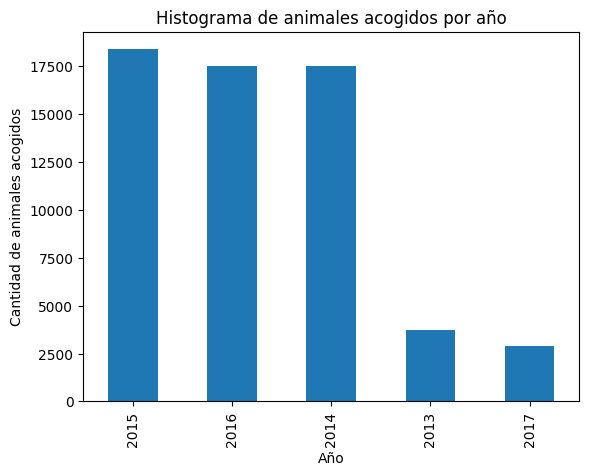

In [230]:
# Crear el histograma de la columna DateTimeAcogida agrupado por años
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
columna_año.value_counts().plot(kind="bar")
plt.pyplot.xlabel("Año")
plt.pyplot.ylabel("Cantidad de animales acogidos")
plt.pyplot.title("Histograma de animales acogidos por año")
plt.pyplot.show()

In [231]:
# Extrae el año de la columna "fecha"
columna_año1 = data["DateTimeSalida"].dt.year
# Ordenar la columna por Años
columna_año1 = columna_año1.sort_values()
columna_año1.head(10)

52096    2013
33744    2013
24699    2013
14572    2013
16171    2013
34730    2013
16170    2013
2237     2013
16168    2013
42234    2013
Name: DateTimeSalida, dtype: int32

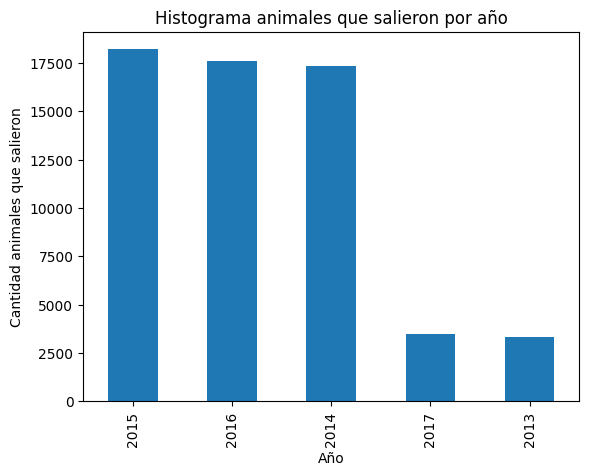

In [232]:
# Crear el histograma de la columna DateTimeSalida agrupado por años
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
columna_año1.value_counts().plot(kind="bar")
plt.pyplot.xlabel("Año")
plt.pyplot.ylabel("Cantidad animales que salieron")
plt.pyplot.title("Histograma animales que salieron por año")
plt.pyplot.show()

- En ambos histogramas podemos observar que la cantidad de animales que entran y salen son casi las mismas por año, con algunas diferencias pero de comportamiento muy similar, lo que nos da a entender que el flujo de animales en el refugio es bastante bueno, lo que da a entender que así como muchos animales son ayudados en las calles, también hay muchos animales que son ayudados en el refugio. 

Text(0.5, 1.0, 'Manera en la que el animal llegó al centro')

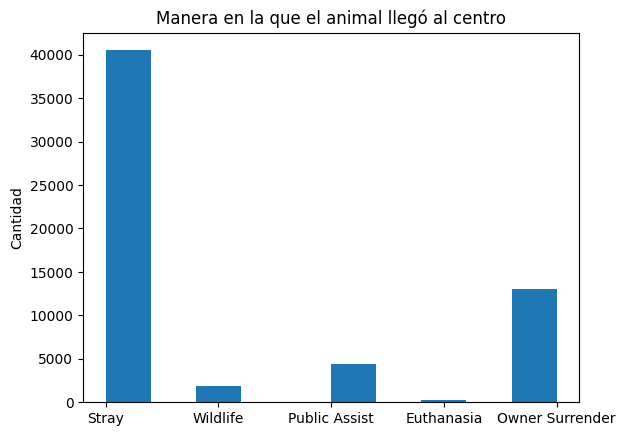

In [58]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data["ManeraAcogida"])

# set x/y labels and plot title
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Manera en la que el animal llegó al centro")

- En el histograma anterior se puede observar como la mayoría (por mucha diferencia) de animales que llegan están extraviados, el otro grupo de animales con una cantidad considerable son entregados por los dueños, y la cantidad restante se dividen entre la asistencia pública del estado, los encontrados en la fauna y a los que los entregaban para aplicarles la eutanasia, la anterior información nos da una posible razón del porqué el flujo de los animales es tan alta, quizás al ser extraviados sus dueños los buscan hasta finalmente poder volver a tener, también nos habla de la comunidad y la importancia que pueden tener los animales en su cultura, al tener la responsabilidad de entregar el animalito en un lugar donde cuiden de él y que también los entes públicos ayuden a esto da una muy buena perspectiva de la colectividad y cultura de las personas

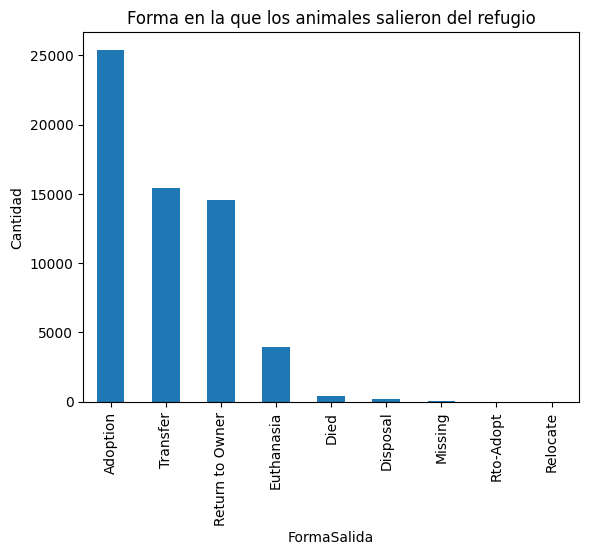

In [59]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
data['FormaSalida'].value_counts().plot(kind="bar")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Forma en la que los animales salieron del refugio")
plt.pyplot.show()

Text(0.5, 1.0, 'Condición en la que el animal llegó')

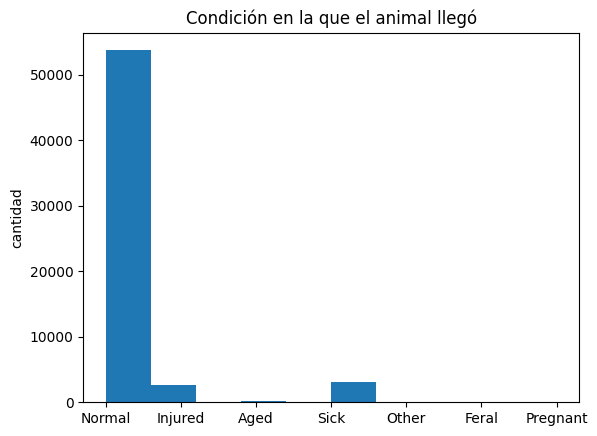

In [60]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data["CondicionAcogida"])

# set x/y labels and plot title
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Condición en la que el animal llegó")

- En este histograma conoces un poco sobre la condición en la que los animales llegan al refugio, la mayoría de ellos llegan en un estado normal, sin embargo hay algunos que si pueden llegar enfermos o heridos, y también algunos pocos tienen edades muy altas, llegan en estado salvaje o en embarazo. Este es un paisaje bastante bueno para la calidad de vida de los animalitos en Austin, nos podemos hacer una idea del cuidado que se le brinda a ellos, así como la importancia por su salud y el poco abuso que se podría generar hacia ellos 

Text(0.5, 1.0, 'Sexo del animal')

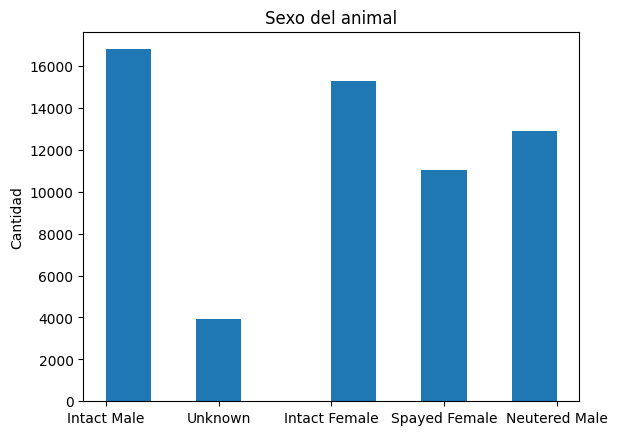

In [61]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data["SexoAnimal"])

# set x/y labels and plot title
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Sexo del animal")

- Acá observamos la distribución del sexo en los animales, existen tanto del género femenino esterilizadas como no, y lo mismo sucede en el género masculino, sin embargo, el género masculino tiene una proporción más alta, así mismo, hay una gran cantidad de datos que hacen referencia a al género desconocido, lo anterior nos puede dar la idea de que quizás estos datos desconocidos pueden pertenecer en gran medida al género másculino.

Text(0.5, 1.0, 'Especies de animales que llegan al refugio')

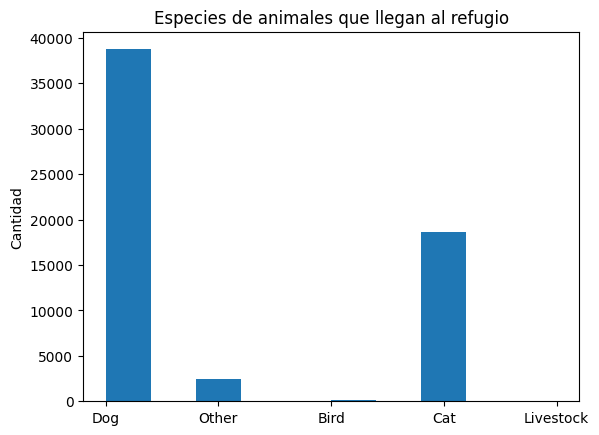

In [62]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data["TipoAnimal"])

# set x/y labels and plot title
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Especies de animales que llegan al refugio")

In [233]:
import numpy as np
bins = np.linspace((min(data['Edad'])), max(data['Edad']), 7)
agrupacion = ['1 - 4', '4 - 8','8 - 12', '12 - 16','16 - 20','20 - 24']
bins

array([   0.        , 1520.83333333, 3041.66666667, 4562.5       ,
       6083.33333333, 7604.16666667, 9125.        ])

In [234]:
data['EdadAgrupada'] = pd.cut(data['Edad'], bins, labels=agrupacion, include_lowest=True )
data['EdadAgrupada'].value_counts()

EdadAgrupada
1 - 4      50544
4 - 8       6465
8 - 12      2283
12 - 16      641
16 - 20       61
20 - 24        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Rango de edad de los animales que entraron al refugio en años')

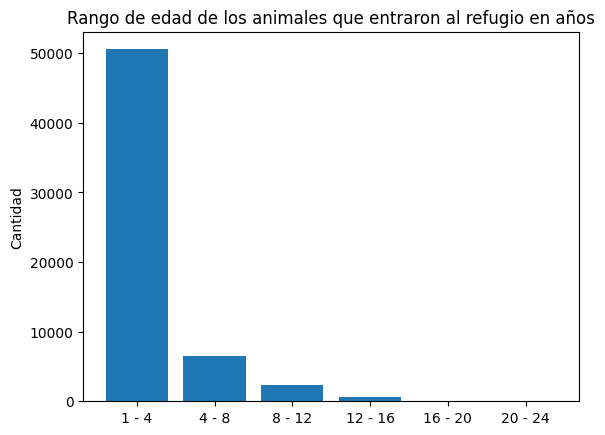

In [65]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(agrupacion, data['EdadAgrupada'].value_counts())

# set x/y labels and plot title
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Rango de edad de los animales que entraron al refugio en años")

- En el anterior histograma estuve realizando la clasificación de la edad de los animales que entraban al refugio, la distribución la realicé por medio de la cantidad de días que tenían los animales y de allí pase a realizar los rangos, se puede visualizar que la mayoria de animales se ubican en el primer rango 1 - 4 años pero también observamos que hay animales muy longevos que alcanzaron a llegar al refugio lo cual es sorprendente, pues un animal extraviado o en condiciones de calle y que tenga además tanta edad es muy difícil que sobreviva, sin embargo algunos de ellos tal vez lo hicieron y esto nos da a entender que tanto la calidad de vida como la longevidad de los animales es mucho mayor a la que estamos viendo en nuestro país

In [235]:
import numpy as np
bins = np.linspace((min(data['EdadSalida'])), max(data['EdadSalida']), 7)
agrupacion = ['1 - 4', '4 - 8','8 - 12', '12 - 16','16 - 20','20 - 24']
bins

array([   0.        , 1520.83333333, 3041.66666667, 4562.5       ,
       6083.33333333, 7604.16666667, 9125.        ])

In [236]:
data['EdadSAgrupada'] = pd.cut(data['EdadSalida'], bins, labels=agrupacion, include_lowest=True )
data['EdadSAgrupada'].value_counts()

EdadSAgrupada
1 - 4      50442
4 - 8       6519
8 - 12      2315
12 - 16      656
16 - 20       62
20 - 24        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Rango de edad de los animales que salieron del refugio en años')

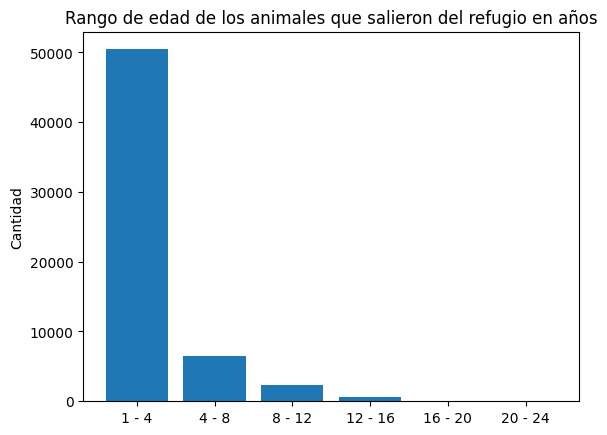

In [68]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(agrupacion, data['EdadSAgrupada'].value_counts())

# set x/y labels and plot title
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Rango de edad de los animales que salieron del refugio en años")

- En el anterior histograma sucede lo mismo que en el anterior de las edades de ingreso, con la única diferencia que incrementan algunas unidades en los rangos de edades más altas, esto puede ser a que varios animales se quedaron en el refugio algún tiempo y esto hizo que los valores de la edad en la salida incrementaran un poco.

Text(0.5, 1.0, 'Género de los animales que entraron al refugio')

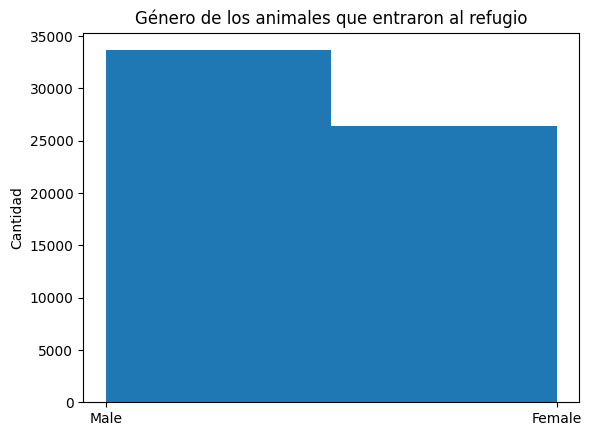

In [69]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data['GeneroAcogida'], bins=2)

# set x/y labels and plot title
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Género de los animales que entraron al refugio")

Text(0.5, 1.0, 'Género de los animales que salieron del refugio')

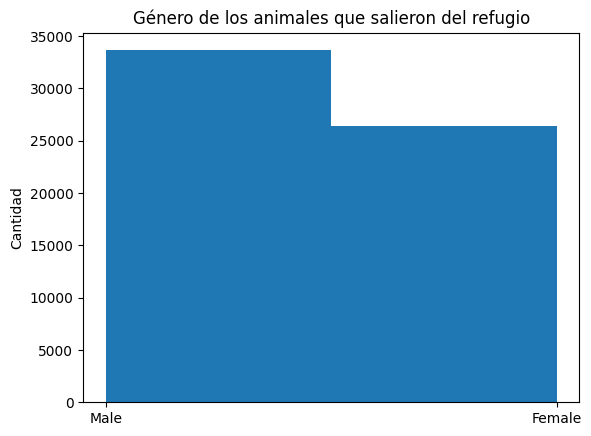

In [70]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data['GeneroSalida'], bins=2)

# set x/y labels and plot title
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Género de los animales que salieron del refugio")

Text(0.5, 1.0, 'Esterilizaciones que se hicieron en el refugio')

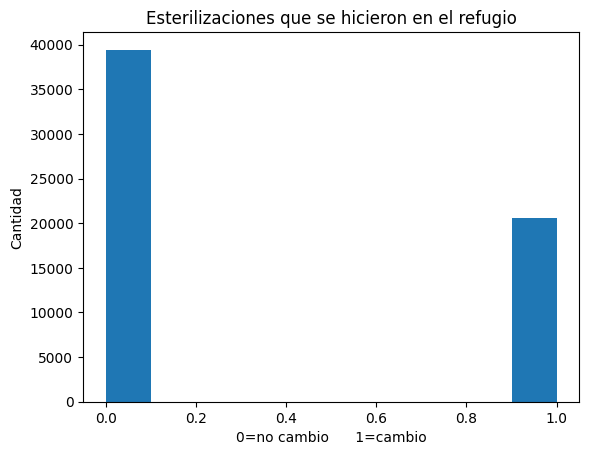

In [71]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data['CambioEsterilizacion'])

# set x/y labels and plot title
plt.pyplot.ylabel("Cantidad")
plt.pyplot.xlabel('0=no cambio      1=cambio')
plt.pyplot.title("Esterilizaciones que se hicieron en el refugio")

In [237]:

#Hice esto para separar los días de la hora en columnas diferentes
# Convierte la columna "DuracionAcogida" a objetos timedelta
data["DuracionAcogida"] = pd.to_timedelta(data["DuracionAcogida"])

# Extrae los días y la hora
data["Dias"] = data["DuracionAcogida"].dt.days

# Extrae la hora exacta utilizando el método dt.components() y la clave 'hours'
data["Hora_Exacta"] = data["DuracionAcogida"].dt.components['hours']


In [238]:
import numpy as np
bins = np.linspace((min(data['Dias'])), max(data['Dias']), 5)
agrupacion = ['Poco', 'Medio', 'Mucho', 'Bastante']
bins

array([   0. ,  316.5,  633. ,  949.5, 1266. ])

In [239]:
data['TiempoAgrupado'] = pd.cut(data['Dias'], bins, labels=agrupacion, include_lowest=True )
data['TiempoAgrupado'].value_counts()

TiempoAgrupado
Poco        57108
Medio        2044
Mucho         670
Bastante      177
Name: count, dtype: int64

Text(0.5, 1.0, 'Rango de tiempo que los animales han permanecido')

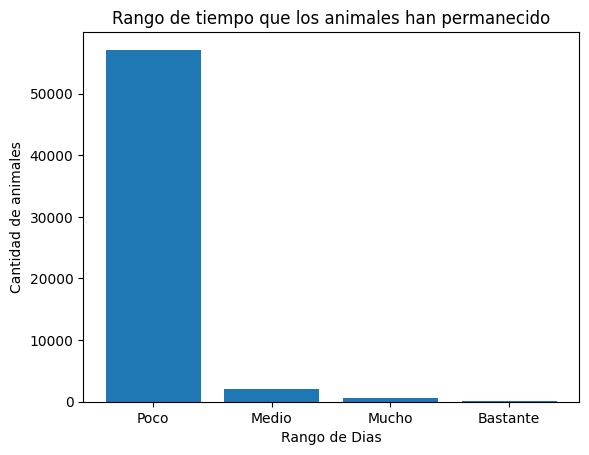

In [75]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(agrupacion, data['TiempoAgrupado'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Rango de Dias")
plt.pyplot.ylabel("Cantidad de animales")
plt.pyplot.title("Rango de tiempo que los animales han permanecido")

- En este histograma tuve que realizar la subdivisión de las columnas para separar las horas exactas de los días y así poder hacer la cuenta y los rangos, en general, podemos decir que los animales en el refugio duran muy poco, esto es bastante interesante ya que un muchas fundaciones locales no se logra conseguir esta clase de flujo, esto nos puede llevar a preguntas de cómo hacen para que este flujo sea tan alto, o quizás qué hay de diferente en las culturas que hace que los animales sean un poco más respetados en ciudades como Austin, de igual manera existen animales que llevan bastante tiempo, pero en relación con la cantidad no es una cifra preocupante

### **Variables Indicadoras:**
Acá voy a empezar a realizar las variables indicadoras para a la hora de hacer el modelo regresión, pueda comprender mejor los datos.
- Comenzaré por la columna **NombreAcogida** allí, voy a crear una variable indicadora o una columna categórica indicando si el animal tiene o no nombre o no para poder después mirar en el modelo de correlación que tanta influencia tiene el nombre en la adopción de un animalito.

- Continuaré con la columnna **FormaSalida** Para saber si fue adopatado o no, esto con la finalidad de tener el resultado y los datos de los animales adoptados más a la mano.

- Y finalmente le asignaré los valores de True y False a la columna de **Genero** para tener más claridad a la hora de realizar el modelo.

In [240]:
# Definir una función lambda para verificar si el nombre es diferente a "noname"
tiene_nombre = lambda nombre: nombre != "noname"

# Aplicar la función lambda a la columna "NombreAcogida" y crea una nueva columna llamada "TieneNombre"
data["TieneNombre"] = data["NombreAcogida"].apply(tiene_nombre)

# Reemplazar True/False por nombre/nonombre
data["TieneNombre"]= data['TieneNombre'].replace({True: "nombre", False: "nonombre"})
data['TieneNombre'].head()


0      nombre
1    nonombre
2    nonombre
3    nonombre
4      nombre
Name: TieneNombre, dtype: object

In [241]:
# Definir una función lambda para verificar si la Forma de salida es diferente a "Adoption"
adoptado = lambda adoptado: adoptado != "Adoption"

# Aplicar la función lambda a la columna "FormaSalida" y crea una nueva columna llamada "NoAdoptado"
data["Adoptado"] = data["FormaSalida"].apply(adoptado)

# Reemplazar True/False por nombre/nonombre
data["Adoptado"]= data['Adoptado'].replace({True: "noadoptado", False: "adoptado"})
data['Adoptado'].head()

data['Adoptado'].head(10)

0      adoptado
1    noadoptado
2    noadoptado
3    noadoptado
4      adoptado
5      adoptado
6    noadoptado
7    noadoptado
8      adoptado
9    noadoptado
Name: Adoptado, dtype: object

Por otro lado voy a empezar a agrupar los datos de las columnas para poder hacer el modelo de correlación más preciso y sencillo

In [242]:
# Crear la columna "MesAñoSalida" que muestra el mes y el año en conjunto
data["MesAñoSalida"] = pd.to_datetime(data["DateTimeSalida"]).dt.strftime("%b %Y")


In [81]:
data.head()

,Animal ID,NombreAcogida,DateTimeAcogida,MesAcogida,LugarAcogida,ManeraAcogida,CondicionAcogida,TipoAnimal,SexoAnimal,Edad,...,DuracionAcogida,EdadAgrupada,EdadSAgrupada,Dias,Hora_Exacta,TiempoAgrupado,TieneNombre,Adoptado,ColorPrimario,MesAñoSalida
0,A725713,*Luxor,2016-05-02,05/02/2016 11:43,100 Block Of East Murray in Manor (TX),Stray,Normal,Dog,Intact Male,730,...,4 days 12:17:00,1 - 4,1 - 4,4,12,Poco,nombre,adoptado,Black,May 2016
1,A701465,noname,2015-04-29,04/29/2015 10:18:00 PM,100 E Hoopes Ave in Travis (TX),Wildlife,Normal,Other,Unknown,150,...,32 days 15:13:00,1 - 4,1 - 4,32,15,Poco,nonombre,noadoptado,Brown,Jun 2015
2,A690177,noname,2014-10-15,10/15/2014 04:46:00 PM,100 E10Th in Austin (TX),Wildlife,Normal,Other,Unknown,90,...,0 days 15:18:00,1 - 4,1 - 4,0,15,Poco,nonombre,noadoptado,Brown,Oct 2014
3,A668614,noname,2013-12-05,12/05/2013 23:22,Martin Luther King Jr in Austin (TX),Stray,Injured,Dog,Intact Female,2190,...,3 days 15:40:00,4 - 8,4 - 8,3,15,Poco,nonombre,noadoptado,Brown,Dec 2013
4,A674484,*Beans,2014-03-13,03/13/2014 05:37:00 PM,100 Water Rd in Webberville (TX),Stray,Normal,Dog,Intact Male,730,...,36 days 22:33:00,1 - 4,1 - 4,36,22,Poco,nombre,adoptado,Black,Apr 2014


### **Correlación entre variables**
- Para empezar a correlacionar las columnas vamos a tener que dejar claro cual de ellas vamos a escoger, y el porqué, es de este modo que teniendo en total 34 columnas vamos a escoger **TieneNombre, DateTimeAcogida(Por años), ManeraAcogida, CondiciónAcogida, TipoAnimal, Edad, Color, DateTimeSalida, MesAñoSalida,Adoptado, SexoSalida, EdadSalida, RazaGeneral, Dias**

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
data [['Edad' , 'Dias']].corr()

,Edad,Dias
Edad,1.000000,0.101156
Dias,0.101156,1.000000


(0.0, 1329.3)

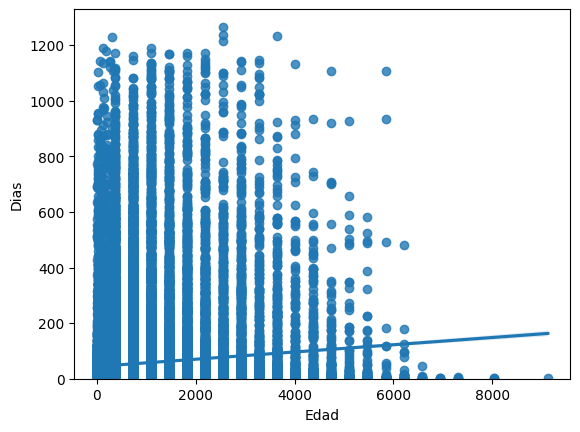

In [84]:
sns.regplot(x = 'Edad' , y = 'Dias', data = data)
plt.ylim(0,)

Un valor de correlación de 0.101156 es cercano a 0, lo que significa que la relación lineal entre la edad de los animales y la cantidad de días que se quedan en el refugio es débil.
El valor positivo (0.101156) indica que existe una leve tendencia a que los animales más viejos se queden más días en el refugio. Sin embargo, esta tendencia es débil y no significa que haya una relación causal directa entre la edad y el tiempo de permanencia.

Es importante tener en cuenta que la correlación no implica causalidad. Solo porque dos variables estén correlacionadas no significa que una cause la otra. En este caso, es posible que haya otros factores que influyan en la cantidad de días que un animal se queda en el refugio, como la raza, la condición de salud, el comportamiento, o la disponibilidad de hogares adoptivos.

<Axes: xlabel='Adoptado', ylabel='Edad'>

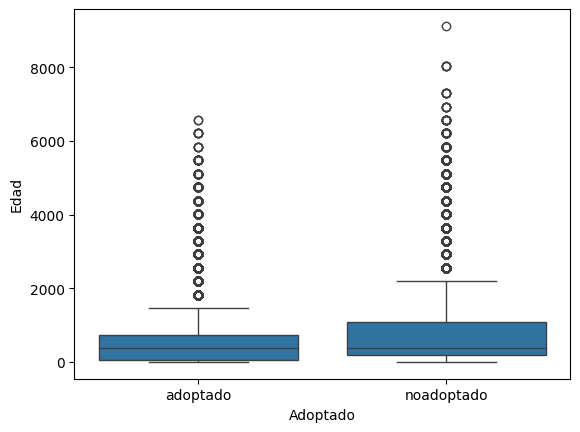

In [85]:
sns.boxplot (x = 'Adoptado', y = 'Edad', data = data)

In [244]:
from scipy.stats import chi2_contingency
contingencia = pd.crosstab(data["Edad"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia
#Se calculan los grados de libertad:
#(numero filas - 1)*(numero columnas - 1)
#(45-1)*(2-1)=44

Chi-cuadrado:  3845.0875215044316


Adoptado,adoptado,noadoptado
Edad,,
0,106,162
1,68,123
2,40,136
3,19,174
4,45,66
5,12,61
6,19,73
7,141,552
14,152,754


<Axes: xlabel='Adoptado', ylabel='EdadSalida'>

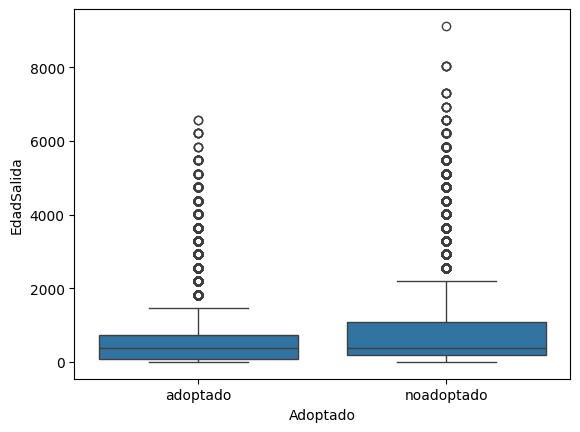

In [245]:
sns.boxplot (x = 'Adoptado', y = 'EdadSalida', data = data)

<Axes: xlabel='Adoptado', ylabel='Dias'>

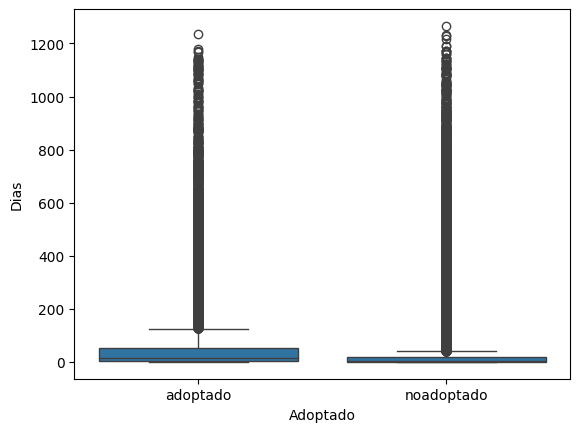

In [87]:
sns.boxplot (x = 'Adoptado', y = 'Dias', data = data)

- Ahora empezaremos a encontrar la correlación entre las variables categóricas, para ello voy a utilizar las tablas de contingencia, el chi-cuadrado y el Valor p de la librería Spicy

In [246]:
AñosNum = {
    "Jan 2013": "201301",
    "Feb 2013": "201302",
    "Mar 2013": "201303",
    "Apr 2013": "201304",
    "May 2013": "201305",
    "Jun 2013": "201306",
    "Jul 2013": "201307",
    "Aug 2013": "201308",
    "Sep 2013": "201309",
    "Oct 2013": "201310",
    "Nov 2013": "201311",
    "Dec 2013": "201312",
    "Jan 2014": "201401",
    "Feb 2014": "201402",
    "Mar 2014": "201403",
    "Apr 2014": "201404",
    "May 2014": "201405",
    "Jun 2014": "201406",
    "Jul 2014": "201407",
    "Aug 2014": "201408",
    "Sep 2014": "201409",
    "Oct 2014": "201410",
    "Nov 2014": "201411",
    "Dec 2014": "201412",
    "Jan 2015": "201501",
    "Feb 2015": "201502",
    "Mar 2015": "201503",
    "Apr 2015": "201504",
    "May 2015": "201505",
    "Jun 2015": "201506",
    "Jul 2015": "201507",
    "Aug 2015": "201508",
    "Sep 2015": "201509",
    "Oct 2015": "201510",
    "Nov 2015": "201511",
    "Dec 2015": "201512",
    "Jan 2016": "201601",
    "Feb 2016": "201602",
    "Mar 2016": "201603",
    "Apr 2016": "201604",
    "May 2016": "201605",
    "Jun 2016": "201606",
    "Jul 2016": "201607",
    "Aug 2016": "201608",
    "Sep 2016": "201609",
    "Oct 2016": "201610",
    "Nov 2016": "201611",
    "Dec 2016": "201612",
    "Jan 2017": "201701",
    "Feb 2017": "201702",
    "Mar 2017": "201703",
    "Apr 2017": "201704",
    "May 2017": "201705",
    "Jun 2017": "201706",
    "Jul 2017": "201707",
    "Aug 2017": "201708",
    "Sep 2017": "201709",
    "Oct 2017": "201710",
    "Nov 2017": "201711",
    "Dec 2017": "201712"
}

In [247]:
data["AñosNum"] = data["MesAñoSalida"].replace(AñosNum)
data['AñosNum'].head()

0    201605
1    201506
2    201410
3    201312
4    201404
Name: AñosNum, dtype: object

In [88]:
df2013 = data[data["MesAñoSalida"].str.contains("2013")]
df2013.head()

,Animal ID,NombreAcogida,DateTimeAcogida,MesAcogida,LugarAcogida,ManeraAcogida,CondicionAcogida,TipoAnimal,SexoAnimal,Edad,...,DuracionAcogida,EdadAgrupada,EdadSAgrupada,Dias,Hora_Exacta,TiempoAgrupado,TieneNombre,Adoptado,ColorPrimario,MesAñoSalida
3,A668614,noname,2013-12-05,12/05/2013 23:22,Martin Luther King Jr in Austin (TX),Stray,Injured,Dog,Intact Female,2190,...,3 days 15:40:00,4 - 8,4 - 8,3,15,Poco,nonombre,noadoptado,Brown,Dec 2013
32,A668522,Taquita,2013-12-04,12/04/2013 20:40,1000 E. 41St St. in Austin (TX),Public Assist,Normal,Dog,Intact Female,2190,...,9 days 22:21:00,4 - 8,4 - 8,9,22,Poco,nombre,noadoptado,Red,Dec 2013
35,A668523,Chique,2013-12-04,12/04/2013 20:40,1000 E. 41St St. in Austin (TX),Public Assist,Normal,Dog,Intact Female,1460,...,9 days 22:19:00,1 - 4,1 - 4,9,22,Poco,nombre,noadoptado,Tan,Dec 2013
53,A668218,noname,2013-11-30,11/30/2013 12:36:00 PM,1006 E 7Th St in Austin (TX),Stray,Normal,Cat,Intact Female,30,...,9 days 01:58:00,1 - 4,1 - 4,9,1,Poco,nonombre,adoptado,Black,Dec 2013
54,A668217,noname,2013-11-30,11/30/2013 12:36:00 PM,1006 E 7Th St in Austin (TX),Stray,Normal,Cat,Intact Female,30,...,4 days 06:11:00,1 - 4,1 - 4,4,6,Poco,nonombre,adoptado,Blue,Dec 2013


In [248]:
contingencia = pd.crosstab(df2013["Adoptado"], df2013["MesAñoSalida"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  45.54633771253508


MesAñoSalida,Dec 2013,Nov 2013,Oct 2013
Adoptado,,,
adoptado,559,426,284
noadoptado,710,701,663


In [249]:
df2014 = data[data["MesAñoSalida"].str.contains("2014")]
df2014.head()

,Animal ID,NombreAcogida,DateTimeAcogida,MesAcogida,LugarAcogida,ManeraAcogida,CondicionAcogida,TipoAnimal,SexoAnimal,Edad,...,DuracionAcogida,EdadAgrupada,EdadSAgrupada,Dias,Hora_Exacta,TiempoAgrupado,TieneNombre,Adoptado,MesAñoSalida,AñosNum
2,A690177,noname,2014-10-15,10/15/2014 04:46:00 PM,100 E10Th in Austin (TX),Wildlife,Normal,Other,Unknown,90,...,0 days 15:18:00,1 - 4,1 - 4,0,15,Poco,nonombre,noadoptado,Oct 2014,201410
4,A674484,*Beans,2014-03-13,03/13/2014 05:37:00 PM,100 Water Rd in Webberville (TX),Stray,Normal,Dog,Intact Male,730,...,36 days 22:33:00,1 - 4,1 - 4,36,22,Poco,nombre,adoptado,Apr 2014,201404
5,A690430,Mia,2014-10-20,10/20/2014 03:58:00 PM,100 Wonsley Dr E in Austin (TX),Stray,Normal,Dog,Intact Female,730,...,4 days 22:01:00,1 - 4,1 - 4,4,22,Poco,nombre,adoptado,Oct 2014,201410
7,A593537,Chacha,2015-03-01,03/01/2015 10:41,1000 Blk Lott Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2190,...,290 days 01:31:00,4 - 8,4 - 8,290,1,Poco,nombre,noadoptado,May 2014,201405
8,A593537,Chacha,2015-03-01,03/01/2015 10:41,1000 Blk Lott Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2190,...,168 days 07:24:00,4 - 8,4 - 8,168,7,Poco,nombre,adoptado,Sep 2014,201409


In [250]:
contingencia = pd.crosstab(df2014["Adoptado"], df2014["MesAñoSalida"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  147.44596858377966


MesAñoSalida,Apr 2014,Aug 2014,Dec 2014,Feb 2014,Jan 2014,Jul 2014,Jun 2014,Mar 2014,May 2014,Nov 2014,Oct 2014,Sep 2014
Adoptado,,,,,,,,,,,,
adoptado,442,761,642,405,473,849,647,458,453,525,579,593
noadoptado,871,910,803,637,714,1049,919,901,995,895,898,943


In [251]:
df2015 = data[data["MesAñoSalida"].str.contains("2015")]
df2015.head()

,Animal ID,NombreAcogida,DateTimeAcogida,MesAcogida,LugarAcogida,ManeraAcogida,CondicionAcogida,TipoAnimal,SexoAnimal,Edad,...,DuracionAcogida,EdadAgrupada,EdadSAgrupada,Dias,Hora_Exacta,TiempoAgrupado,TieneNombre,Adoptado,MesAñoSalida,AñosNum
1,A701465,noname,2015-04-29,04/29/2015 10:18:00 PM,100 E Hoopes Ave in Travis (TX),Wildlife,Normal,Other,Unknown,150,...,32 days 15:13:00,1 - 4,1 - 4,32,15,Poco,nonombre,noadoptado,Jun 2015,201506
6,A593537,Chacha,2015-03-01,03/01/2015 10:41,1000 Blk Lott Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2190,...,3 days 07:33:00,4 - 8,4 - 8,3,7,Poco,nombre,noadoptado,Mar 2015,201503
9,A593537,Chacha,2015-03-01,03/01/2015 10:41,1000 Blk Lott Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2190,...,275 days 04:08:00,4 - 8,4 - 8,275,4,Poco,nombre,noadoptado,Dec 2015,201512
11,A593537,Chacha,2015-03-01,03/01/2015 10:41,1000 Blk Lott Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2190,...,267 days 04:43:00,4 - 8,4 - 8,267,4,Poco,nombre,noadoptado,Nov 2015,201511
12,A697810,Raider,2015-03-01,03/01/2015 10:41,1000 Blk Lott Ave in Austin (TX),Stray,Normal,Dog,Intact Male,365,...,65 days 08:24:00,1 - 4,1 - 4,65,8,Poco,nombre,adoptado,May 2015,201505


In [252]:
contingencia = pd.crosstab(df2015["Adoptado"], df2015["MesAñoSalida"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  148.31477684250552


MesAñoSalida,Apr 2015,Aug 2015,Dec 2015,Feb 2015,Jan 2015,Jul 2015,Jun 2015,Mar 2015,May 2015,Nov 2015,Oct 2015,Sep 2015
Adoptado,,,,,,,,,,,,
adoptado,436,688,629,506,575,834,720,518,626,626,598,621
noadoptado,918,920,779,642,676,965,1165,741,1263,937,937,888


In [253]:
df2016 = data[data["MesAñoSalida"].str.contains("2016")]
df2016.head()

,Animal ID,NombreAcogida,DateTimeAcogida,MesAcogida,LugarAcogida,ManeraAcogida,CondicionAcogida,TipoAnimal,SexoAnimal,Edad,...,DuracionAcogida,EdadAgrupada,EdadSAgrupada,Dias,Hora_Exacta,TiempoAgrupado,TieneNombre,Adoptado,MesAñoSalida,AñosNum
0,A725713,*Luxor,2016-05-02,05/02/2016 11:43,100 Block Of East Murray in Manor (TX),Stray,Normal,Dog,Intact Male,730,...,4 days 12:17:00,1 - 4,1 - 4,4,12,Poco,nombre,adoptado,May 2016,201605
13,A722871,noname,2016-03-23,03/23/2016 02:54:00 PM,1000 E 11Th in Austin (TX),Wildlife,Normal,Other,Unknown,365,...,0 days 00:08:00,1 - 4,1 - 4,0,0,Poco,nonombre,noadoptado,Mar 2016,201603
16,A723964,noname,2016-04-09,04/09/2016 15:00,1000 E 41St in Austin (TX),Stray,Normal,Dog,Intact Female,28,...,23 days 00:34:00,1 - 4,1 - 4,23,0,Poco,nonombre,adoptado,May 2016,201605
17,A723965,Belle,2016-04-09,04/09/2016 15:00,1000 E 41St in Austin (TX),Stray,Normal,Dog,Intact Female,28,...,22 days 02:43:00,1 - 4,1 - 4,22,2,Poco,nombre,adoptado,May 2016,201605
18,A730511,Rocky,2016-07-05,07/05/2016 17:50,1000 E 41St St in Austin (TX),Stray,Normal,Dog,Neutered Male,1825,...,147 days 19:08:00,4 - 8,4 - 8,147,19,Poco,nombre,noadoptado,Nov 2016,201611


In [254]:
contingencia = pd.crosstab(df2016["Adoptado"], df2016["MesAñoSalida"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  355.5357527381073


MesAñoSalida,Apr 2016,Aug 2016,Dec 2016,Feb 2016,Jan 2016,Jul 2016,Jun 2016,Mar 2016,May 2016,Nov 2016,Oct 2016,Sep 2016
Adoptado,,,,,,,,,,,,
adoptado,474,734,708,583,608,980,825,588,611,734,649,764
noadoptado,849,741,636,601,750,670,709,915,1098,727,782,881


In [255]:
df2017 = data[data["MesAñoSalida"].str.contains("2017")]
df2017.head()

,Animal ID,NombreAcogida,DateTimeAcogida,MesAcogida,LugarAcogida,ManeraAcogida,CondicionAcogida,TipoAnimal,SexoAnimal,Edad,...,DuracionAcogida,EdadAgrupada,EdadSAgrupada,Dias,Hora_Exacta,TiempoAgrupado,TieneNombre,Adoptado,MesAñoSalida,AñosNum
20,A743670,Presley,2017-02-14,02/14/2017 02:19:00 PM,1000 E 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,240,...,6 days 03:31:00,1 - 4,1 - 4,6,3,Poco,nombre,adoptado,Feb 2017,201702
60,A738511,*Helene,2016-11-16,11/16/2016 05:00:00 PM,1007 E 7Th St in Austin (TX),Stray,Normal,Cat,Intact Female,365,...,60 days 07:00:00,1 - 4,1 - 4,60,7,Poco,nombre,noadoptado,Jan 2017,201701
70,A743009,*Gabe,2017-02-01,02/01/2017 19:41,1015 E Yager in Austin (TX),Stray,Normal,Dog,Intact Male,240,...,9 days 15:37:00,1 - 4,1 - 4,9,15,Poco,nombre,adoptado,Feb 2017,201702
98,A731162,Roxy,2017-01-23,01/23/2017 11:03:00 AM,Travis (TX),Owner Surrender,Sick,Dog,Spayed Female,365,...,0 days 01:34:00,1 - 4,1 - 4,0,1,Poco,nombre,noadoptado,Jan 2017,201701
131,A742283,Luna,2017-02-25,02/25/2017 04:35:00 PM,Travis (TX),Owner Surrender,Normal,Dog,Spayed Female,730,...,38 days 15:12:00,1 - 4,1 - 4,38,15,Poco,nombre,noadoptado,Jan 2017,201701


In [256]:
contingencia = pd.crosstab(df2017["Adoptado"], df2017["MesAñoSalida"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  50.39913877321114


MesAñoSalida,Apr 2017,Feb 2017,Jan 2017,Mar 2017
Adoptado,,,,
adoptado,38,640,730,270
noadoptado,25,634,673,459


In [257]:
contingencia = pd.crosstab(data["TieneNombre"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  3179.666263109603


Adoptado,adoptado,noadoptado
TieneNombre,,
nombre,22357,23613
nonombre,3052,10977


In [258]:
contingencia = pd.crosstab(data["ManeraAcogida"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  5454.774673975238


Adoptado,adoptado,noadoptado
ManeraAcogida,,
Euthanasia,19,194
Owner Surrender,8356,4686
Public Assist,621,3726
Stray,16408,24088
Wildlife,5,1896


In [259]:
contingencia = pd.crosstab(data["CondicionAcogida"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  1118.3609977963329


Adoptado,adoptado,noadoptado
CondicionAcogida,,
Aged,52,181
Feral,12,40
Normal,23993,29744
Other,23,81
Pregnant,14,25
Sick,1315,4519


In [260]:
contingencia = pd.crosstab(data["TipoAnimal"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  1546.7010337756035


Adoptado,adoptado,noadoptado
TipoAnimal,,
Bird,65,122
Cat,8054,10603
Dog,17196,21537
Livestock,2,3
Other,92,2325


In [261]:
contingencia = pd.crosstab(data["SexoSalida"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  11796.859154151309


Adoptado,adoptado,noadoptado
SexoSalida,,
Intact Female,494,5170
Intact Male,357,5663
Neutered Male,12458,11246
Spayed Female,12064,8643
Unknown,36,3868


In [103]:
contingencia = pd.crosstab(data["RazaGeneral"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  380.9391615993997


Adoptado,adoptado,noadoptado
RazaGeneral,,
Beagle,307,369
Boxer,469,680
Chihuahua,2455,2608
Pastor,1676,1791
Pitbull,2295,4256
Poodle,471,594
Retriever,2608,3073
Rottweiler,188,288
Tejonero,586,541


In [104]:
contingencia = pd.crosstab(data["ColorPrimario"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  409.9085631034854


Adoptado,adoptado,noadoptado
ColorPrimario,,
Apricot,23,31
Black,6440,8433
Blue,1816,2375
Blue,82,126
Blue Brindle,1,1
Brown,4941,7567
Calico,461,503
Chocolate,865,973
Cream,714,837


Las variables que utilizaremos para el modelo según el Chi van a ser las siguientes: **SexoSalida, TipoAnimal, CondicionAcogida, ManeraAcogida, TieneNombre**, esto va a ser para calcular la variable **Adoptado**, según el análisis que hicimos estas son las variables que más influyen a la hora de tomar la decisión de si el animal va a ser adoptado o no. 

### Modelo de Regresión Lineal Múltiple

In [105]:
contingencia = pd.crosstab(data["SexoSalida"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  11796.859154151309


Adoptado,adoptado,noadoptado
SexoSalida,,
Intact Female,494,5170
Intact Male,357,5663
Neutered Male,12458,11246
Spayed Female,12064,8643
Unknown,36,3868


In [262]:
# Diccionario para mapear categorías a números
categoria_a_numero = {
    "Intact Female": 1,
    "Intact Male": 2,
    "Neutered Male": 3,
    "Spayed Female": 4,
    "Unknown": 5
}

# Creación de la nueva columna numerada
data["SexoSalidaNum"] = data["SexoSalida"].map(categoria_a_numero)

data['SexoSalidaNum'].head()

0    3
1    5
2    5
3    1
4    3
Name: SexoSalidaNum, dtype: int64

In [106]:
contingencia = pd.crosstab(data["TipoAnimal"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  1546.7010337756035


Adoptado,adoptado,noadoptado
TipoAnimal,,
Bird,65,122
Cat,8054,10603
Dog,17196,21537
Livestock,2,3
Other,92,2325


In [263]:
# Diccionario para mapear categorías a números
categoria_a_numero = {
    "Bird": 1,
    "Cat": 2,
    "Dog": 3,
    "Livestock": 4,
    "Other": 5
}

# Creación de la nueva columna numerada
data["TipoAnimalNum"] = data["TipoAnimal"].map(categoria_a_numero)

data['TipoAnimalNum'].head()


0    3
1    5
2    5
3    3
4    3
Name: TipoAnimalNum, dtype: int64

In [108]:
contingencia = pd.crosstab(data["ManeraAcogida"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  5454.774673975238


Adoptado,adoptado,noadoptado
ManeraAcogida,,
Euthanasia,19,194
Owner Surrender,8356,4686
Public Assist,621,3726
Stray,16408,24088
Wildlife,5,1896


In [264]:
# Diccionario para mapear categorías a números
categoria_a_numero = {
    "Euthanasia": 1,
    "Owner Surrender": 2,
    "Public Assist": 3,
    "Stray": 4,
    "Wildlife": 5
}

# Creación de la nueva columna numerada
data["ManeraAcogidaNum"] = data["ManeraAcogida"].map(categoria_a_numero)

data['ManeraAcogidaNum'].head()

0    4
1    5
2    5
3    4
4    4
Name: ManeraAcogidaNum, dtype: int64

In [109]:
contingencia = pd.crosstab(data["TieneNombre"], data["Adoptado"])
chi2, pval, dof, expected = chi2_contingency(contingencia)
print('Chi-cuadrado: ', chi2)
contingencia

Chi-cuadrado:  3179.666263109603


Adoptado,adoptado,noadoptado
TieneNombre,,
nombre,22357,23613
nonombre,3052,10977


In [265]:
# Diccionario para mapear categorías a números
categoria_a_numero = {
    "nombre": 1,
    "nonombre": 2
}

# Creación de la nueva columna numerada
data["NombreNum"] = data["TieneNombre"].map(categoria_a_numero)

data['NombreNum'].head()

0    1
1    2
2    2
3    2
4    1
Name: NombreNum, dtype: int64

In [266]:
# Diccionario para mapear categorías a números
categoria_a_numero = {
    "adoptado": 1,
    "noadoptado": 0
}

# Creación de la nueva columna numerada
data["AdoptadoNum"] = data["Adoptado"].map(categoria_a_numero)

data['AdoptadoNum'].head()

0    1
1    0
2    0
3    0
4    1
Name: AdoptadoNum, dtype: int64

In [115]:
import sklearn
from sklearn.linear_model import LinearRegression

In [273]:
lm = LinearRegression()
lm

LinearRegression()

In [274]:
X = data[['SexoSalidaNum']]
Y = data['AdoptadoNum']

In [275]:
lm.fit(X,Y)

LinearRegression()

In [276]:
Yhat=lm.predict(X)
Yhat[0:5]

array([0.40555928, 0.59824285, 0.59824285, 0.21287572, 0.40555928])

In [277]:
lm.intercept_

0.11653393445754562

In [278]:
lm.coef_

array([0.09634178])

**Adoptado = 1.8834 - 0.09634 * SexoSalida**

In [279]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="SexoSalidaNum", y="AdoptadoNum", data=data)
plt.ylim(0,)

TypeError: 'module' object is not callable

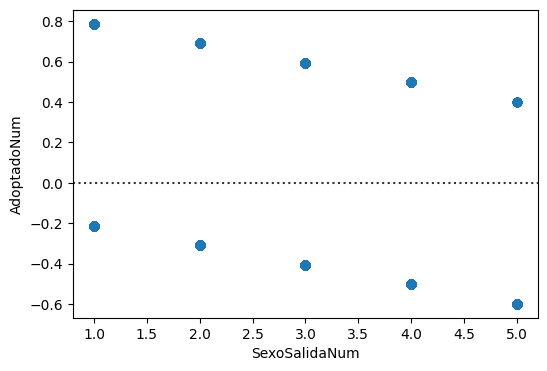

In [158]:
width = 6
height = 4
plt.figure(figsize=(width, height))
sns.residplot(x=data['SexoSalidaNum'], y=data['AdoptadoNum'])
plt.show()

In [159]:
x = data[['SexoSalidaNum', 'TipoAnimalNum', 'CondicionAcogidaNum', 'ManeraAcogidaNum','NombreNum']]

In [143]:
valores_nulos = x.isnull().sum()

print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
SexoSalidaNum          0
TipoAnimalNum          0
CondicionAcogidaNum    0
ManeraAcogidaNum       0
NombreNum              0
dtype: int64


In [160]:
lm.fit(x, data['AdoptadoNum'])

LinearRegression()

In [161]:
lm.intercept_

0.9364750621369182

In [162]:
lm.coef_

array([ 0.10925468, -0.10591941, -0.0166808 , -0.06806401, -0.2113511 ])

Adoptado = 1.06352 -0.1092 x SexoSalidaNuM + 0.1059 x TipoAnimalNum + 0.0166 x CondicionAcogida + 0.068 x ManeraAcogida + 0.211 x NombreNum

In [163]:
Y_hat = lm.predict(x)

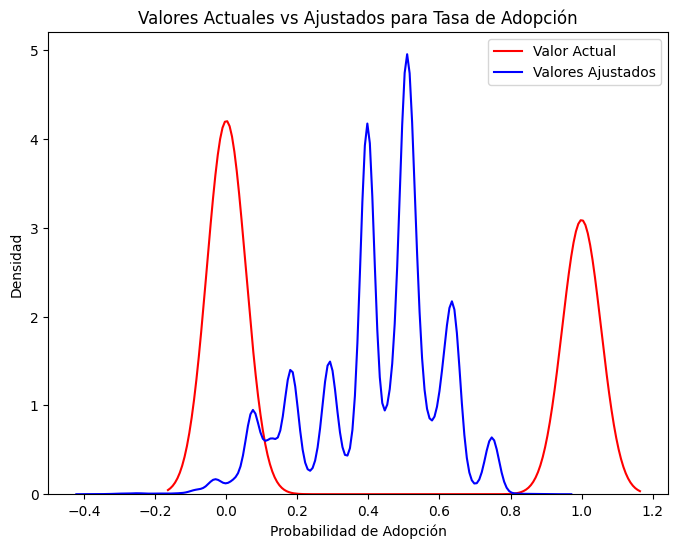

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data and fitted values are stored in 'data' and 'Y_hat' variables

plt.figure(figsize=(width, height))  # Set your desired figure size

sns.kdeplot(data['AdoptadoNum'], color="r", label="Valor Actual")
sns.kdeplot(Y_hat, color="b", label="Valores Ajustados")  # No 'ax' argument needed

plt.title('Valores Actuales vs Ajustados para Tasa de Adopción')  # Suponiendo que se predice la tasa de adopción
plt.xlabel('Probabilidad de Adopción')  # Suponiendo que se predice la probabilidad de adopción entre 0 y 1
plt.ylabel('Densidad')

plt.legend()  # Add legend to identify curves
plt.show()


In [288]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Entrenamiento Polinomial con Matplotlib para Adopción')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('AdopcionNum')

    plt.show()
    plt.close()

In [282]:
x = data['SexoSalidaNum']
y = data['AdoptadoNum']

In [292]:
f = np.polyfit(x, y, 1)
p = np.poly1d(f)
print(p)

 
0.09634 x + 0.1165


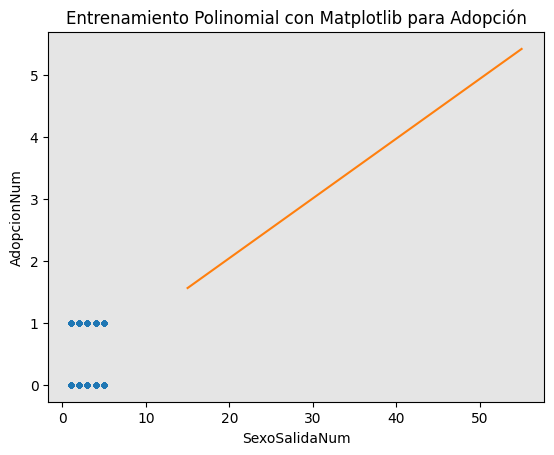

In [293]:
PlotPolly(p, x, y, 'SexoSalidaNum')